<h2 style="display: flex; justify-content: space-between; align-items: center;">
    <span>Exercise 8</span>
    <span>Date: 26/02/2025</span>
</h2>

<h2 style="text-align:center;">Support Vector Classification - Multi class classification</h2>

### <ins>**Aim:**</ins> To build a Support Vector Machine (SVM) classifier to separate two non-linearly separable classes and visualize the decision boundary, margins and support vectors.

### <ins>**Algorithm:**</ins>

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It finds an optimal hyperplane that maximizes the margin between different classes. The decision boundary is determined by support vectors, which are the data points closest to the margin.

The equation of the hyperplane is:
$$w^{T}x+b=0$$
Where:
- $w$ is the weight vector.
- $x$ is the input feature vector.
- $b$ is the bias term.

The decision function is given by:
$$f(x)=sign(w^{T}x+b)$$
where the class label is determined based on the sign of $f(x)$.
</br>
</br>
</br>
For non-linearly separable data, SVM uses a Radial Basis Function (RBF) kernel to map input features into a higher-dimensional space, where a linear separation is possible.

The decision function is given by:  
$$f(x) = \text{sign} \left( \sum_{i=1}^{N} \alpha_i K(x_i, x) + b \right)$$
Where:
- $\alpha_i$ are the Lagrange multipliers,
- $K(x_i, x) = \exp(-\gamma ||x - x_i||^2)$ is the RBF kernel function,
- $ \gamma$ is a hyperparameter controlling the influence of each training point,
- $x_i$ are the support vectors,
- $b$ is the bias term.

Here, the decision boundary is non-linear and shaped based on kernel functions centered around support vectors. The RBF kernel allows SVM to classify data that is not linearly separable in the original input space.
</br>
</br>
</br>
The Polynomial Kernel is a non-linear kernel used in Support Vector Machines (SVM) for classifying data that is not linearly separable. Instead of mapping data into an infinite-dimensional space like the RBF kernel, it applies a polynomial transformation to capture complex relationships between features.

The polynomial kernel function is defined as:  

$$ K(x_i, x_j) = (x_i \cdot x_j + c)^d $$  

Where:
- $x_i, x_j$ are input feature vectors,
- $c$ is a constant (also known as the bias term),
- $d$ is the degree of the polynomial, controlling the complexity of decision boundaries.

Step 1: Import Libraries  

- Import essential Python libraries such as NumPy for numerical operations, Matplotlib for visualization, and specific modules from scikit-learn for data processing, model building, and evaluation.  

Step 2: Load the Dataset  

- Load the Wine dataset and extract the feature matrix `X_wine` and target labels `y_wine`.  

Step 3: Scale the Data  

- Standardize the dataset using `StandardScaler` to normalize feature values.  
- Apply Principal Component Analysis (PCA) with 2 components to reduce dimensionality for visualization.  

Step 4: Visualize Data Points  

- Scatter plot the PCA-transformed data with colors representing different classes.  

Step 5: Train-Test Split  

- Split the dataset into training and testing sets using `train_test_split` with 35% data allocated for testing.  

Step 6: Train the SVM Model with Linear Kernel  

- Initialize the SVM model with a linear kernel.  
- Train the model using the training dataset.  

Step 7: Evaluate the Linear Kernel Model  

- Predict class labels using the trained model.  
- Compute the accuracy score to measure classification performance.  

Step 8: OvO Classification (Linear Kernel)  

- Train the OneVsOne classifier using the linear kernel model.  
- Predict class labels and compute accuracy.  

Step 9: OvR Classification (Linear Kernel)  

- Train the OneVsRest classifier using the linear kernel model.  
- Predict class labels and compute accuracy.  

Step 10: Visualize Classification (Linear Kernel)  

- Plot decision boundaries and support vectors for the linear kernel SVM.  

Step 11: Display Confusion Matrix (Linear Kernel)  

- Generate and display the confusion matrix to analyze classification performance.  

Step 12: Train the SVM Model with RBF Kernel  

- Initialize and train the SVM model using the RBF kernel.  

Step 13: Evaluate the RBF Kernel Model  

- Predict class labels using the trained model.  
- Compute the accuracy score.  

Step 14: OvO Classification (RBF Kernel)  

- Train the OneVsOne classifier using the RBF kernel model.  
- Predict class labels and compute accuracy.  

Step 15: OvR Classification (RBF Kernel)  

- Train the OneVsRest classifier using the RBF kernel model.  
- Predict class labels and compute accuracy.  

Step 16: Visualize Classification (RBF Kernel)  

- Plot decision boundaries and support vectors for the RBF kernel SVM.  

Step 17: Display Confusion Matrix (RBF Kernel)  

- Generate and display the confusion matrix for the RBF kernel model.  

Step 18: Train the SVM Model with Polynomial Kernel  

- Initialize the SVM model with a polynomial kernel of degree 3.  
- Train the model using the training dataset.  

Step 19: Evaluate the Polynomial Kernel Model  

- Predict class labels using the trained model.  
- Compute the accuracy score.  

Step 20: OvO Classification (Polynomial Kernel)  

- Train the OneVsOne classifier using the polynomial kernel model.  
- Predict class labels and compute accuracy.  

Step 21: OvR Classification (Polynomial Kernel)  

- Train the OneVsRest classifier using the polynomial kernel model.  
- Predict class labels and compute accuracy.  

Step 22: Visualize Classification (Polynomial Kernel)  

- Plot decision boundaries and support vectors for the polynomial kernel SVM.  

Step 23: Display Confusion Matrix (Polynomial Kernel)  

- Generate and display the confusion matrix for the polynomial kernel model.  

Step 24: Summarize Results  

- Compare the accuracy of different kernels (Linear, RBF, and Polynomial) for multi-class classification.  


### Import the libraries

In [53]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
warnings.filterwarnings('ignore')

### Load the Dataset

In [54]:
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

### Scale the data

In [55]:
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine_scaled)

### Visualise the data points

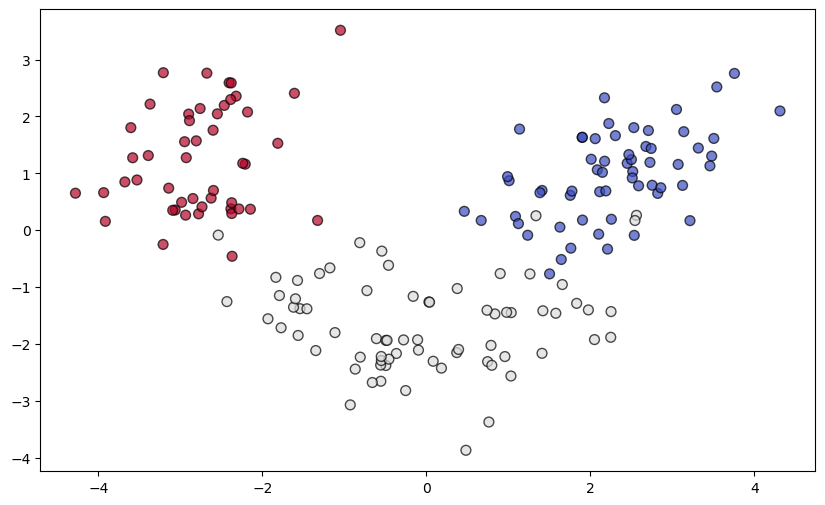

In [56]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_wine, cmap=plt.cm.coolwarm, s=50, edgecolors='k', marker='o', alpha=0.7)

### Split dataset into train and test data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_wine_pca, y_wine, test_size=0.35, random_state=42)

### Train the SVM model with Linear Kernel

In [58]:
svm_model_linear = SVC(kernel='linear', random_state=42)
svm_model_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Evaluating the model

In [59]:
y_pred_linear = svm_model_linear.predict(X_test)
print("Accuracy for Linear Kernel on Wine Quality (Multi-Class):", accuracy_score(y_test, y_pred_linear))

Accuracy for Linear Kernel on Wine Quality (Multi-Class): 0.9841269841269841


#### OvO (Linear Kernel)

In [60]:
ovo_model = OneVsOneClassifier(svm_model_linear)
ovo_model.fit(X_train, y_train)

y_pred_ovo = ovo_model.predict(X_test)
print("Accuracy on Linear Kernel on One vs One Model:", accuracy_score(y_test, y_pred_ovo))

Accuracy on Linear Kernel on One vs One Model: 0.9841269841269841


### OvR (Linear Kernel)

In [61]:
ovr_model = OneVsRestClassifier(svm_model_linear)
ovr_model.fit(X_train, y_train)

y_pred_ovr = ovr_model.predict(X_test)
print("Accuracy on Linear Kernel on One vs Rest Model:", accuracy_score(y_test, y_pred_ovr))

Accuracy on Linear Kernel on One vs Rest Model: 0.9841269841269841


### Visualizing the classification (Linear Kernel)

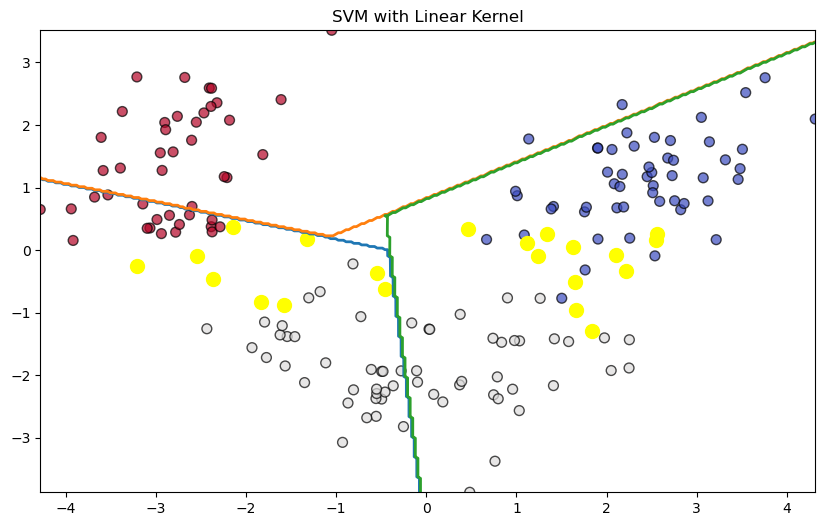

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_wine, cmap=plt.cm.coolwarm, s=50, edgecolors='k', marker='o', alpha=0.7)
plt.title("SVM with Linear Kernel")

xx, yy = np.meshgrid(np.linspace(X_wine_pca[:, 0].min(), X_wine_pca[:, 0].max(), 300),
                     np.linspace(X_wine_pca[:, 1].min(), X_wine_pca[:, 1].max(), 300))

Z = svm_model_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape + (len(np.unique(y_wine)),))  

for i in range(len(np.unique(y_wine))):
    plt.contour(xx, yy, Z[:, :, i], levels=[0], linewidths=2, colors=plt.cm.get_cmap("tab10")(i))

plt.scatter(svm_model_linear.support_vectors_[:, 0], svm_model_linear.support_vectors_[:, 1], color='yellow', s=100, label='Support Vectors')
plt.show()

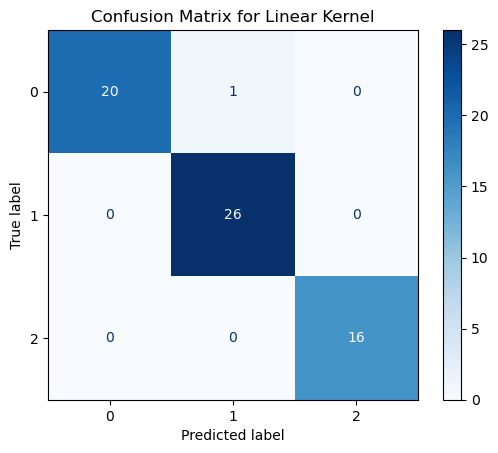

In [63]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
disp_linear.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Linear Kernel")
plt.show()

### RBF Kernel

In [64]:
svm_model_rbf = SVC(kernel='rbf', random_state=42)
svm_model_rbf.fit(X_train, y_train)

SVC(random_state=42)

### Evaluation (RBF Kernel)

In [65]:
y_pred_rbf = svm_model_rbf.predict(X_test)

print("Accuracy for RBF Kernel on Wine Quality (Multi-Class):", accuracy_score(y_test, y_pred_rbf))

Accuracy for RBF Kernel on Wine Quality (Multi-Class): 0.9841269841269841


### OvO (RBF Kernel)

In [66]:
ovo_model = OneVsOneClassifier(svm_model_rbf)
ovo_model.fit(X_train, y_train)

y_pred_ovo = ovo_model.predict(X_test)
print("Accuracy on RBF Kernel on One vs One Model:", accuracy_score(y_test, y_pred_ovo))

Accuracy on RBF Kernel on One vs One Model: 0.9841269841269841


### OvR (RBF Kernel)

In [67]:
ovr_model = OneVsRestClassifier(svm_model_rbf)
ovr_model.fit(X_train, y_train)

y_pred_ovr = ovr_model.predict(X_test)
print("Accuracy on RBF Kernel on One vs Rest Model:", accuracy_score(y_test, y_pred_ovr))

Accuracy on RBF Kernel on One vs Rest Model: 0.9841269841269841


### Visualizing the classification (RBF Kernel)

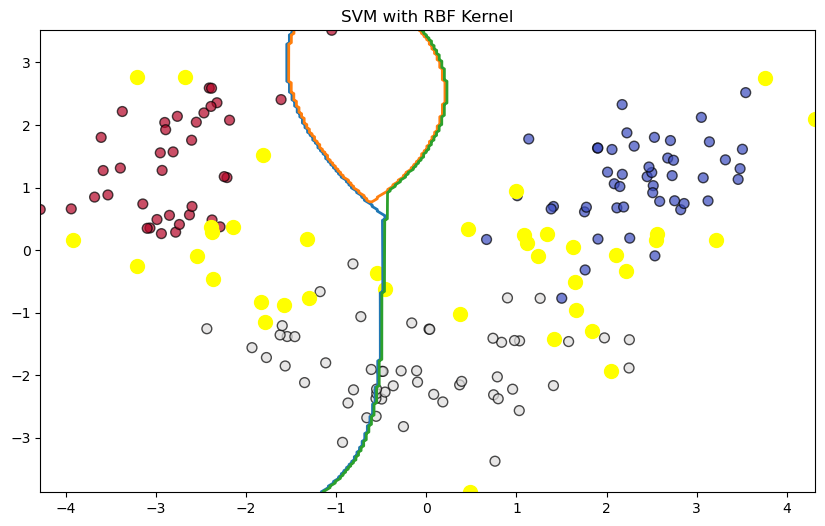

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_wine, cmap=plt.cm.coolwarm, s=50, edgecolors='k', marker='o', alpha=0.7)
plt.title("SVM with RBF Kernel")

xx, yy = np.meshgrid(np.linspace(X_wine_pca[:, 0].min(), X_wine_pca[:, 0].max(), 300),
                     np.linspace(X_wine_pca[:, 1].min(), X_wine_pca[:, 1].max(), 300))

Z = svm_model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape + (len(np.unique(y_wine)),)) 

for i in range(len(np.unique(y_wine))):
    plt.contour(xx, yy, Z[:, :, i], levels=[0], linewidths=2, colors=plt.cm.get_cmap("tab10")(i))

plt.scatter(svm_model_rbf.support_vectors_[:, 0], svm_model_rbf.support_vectors_[:, 1], color='yellow', s=100, label='Support Vectors')
plt.show()

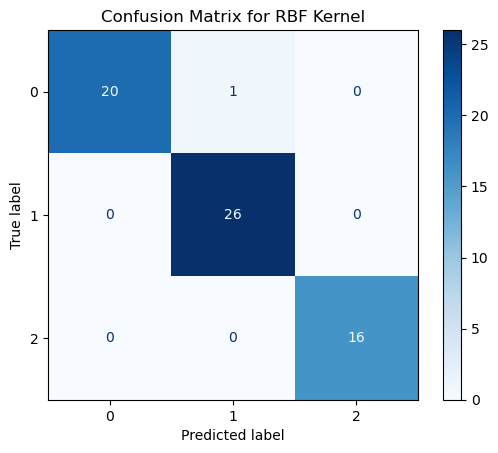

In [69]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp_rbf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for RBF Kernel")
plt.show()

### Polynomial Kernel

In [70]:
svm_model_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_model_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

### Evaluation (Polynomial Kernel)

In [71]:
y_pred_poly = svm_model_poly.predict(X_test)

print("Accuracy for Polynomial Kernel on Wine Quality (Multi-Class):", accuracy_score(y_test, y_pred_poly))

Accuracy for Polynomial Kernel on Wine Quality (Multi-Class): 0.9365079365079365


### OvO (Polynomial Kernel)

In [72]:
ovo_model = OneVsOneClassifier(svm_model_poly)
ovo_model.fit(X_train, y_train)

y_pred_ovo = ovo_model.predict(X_test)
print("Accuracy on Polynomial Kernel on One vs One Model:", accuracy_score(y_test, y_pred_ovo))

Accuracy on Polynomial Kernel on One vs One Model: 0.9365079365079365


### OvR (Polynomial Kernel)

In [73]:
ovr_model = OneVsRestClassifier(svm_model_poly)
ovr_model.fit(X_train, y_train)

y_pred_ovr = ovr_model.predict(X_test)
print("Accuracy on Polynomial Kernel on One vs Rest Model:", accuracy_score(y_test, y_pred_ovr))

Accuracy on Polynomial Kernel on One vs Rest Model: 0.9365079365079365


### Visualizing the Classification (Polynomial Kernel)

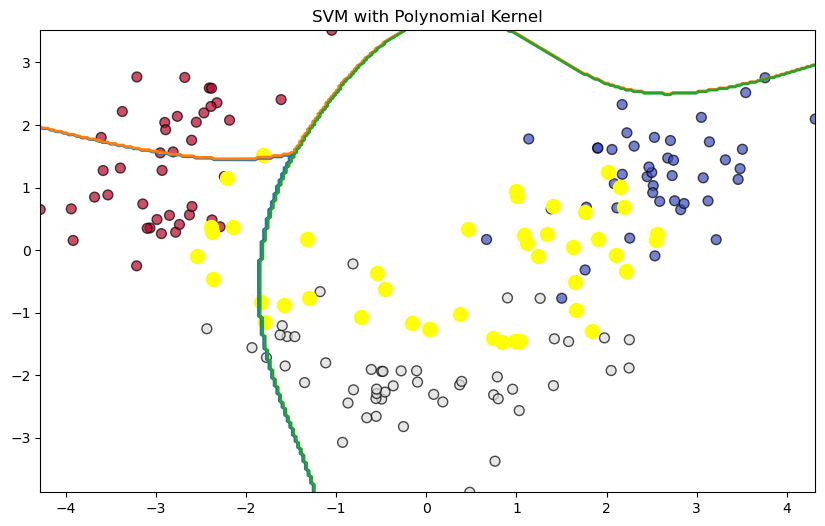

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_wine, cmap=plt.cm.coolwarm, s=50, edgecolors='k', marker='o', alpha=0.7)
plt.title("SVM with Polynomial Kernel")

xx, yy = np.meshgrid(np.linspace(X_wine_pca[:, 0].min(), X_wine_pca[:, 0].max(), 300),
                     np.linspace(X_wine_pca[:, 1].min(), X_wine_pca[:, 1].max(), 300))

Z = svm_model_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape + (len(np.unique(y_wine)),))  

for i in range(len(np.unique(y_wine))):
    plt.contour(xx, yy, Z[:, :, i], levels=[0], linewidths=2, colors=plt.cm.get_cmap("tab10")(i))

plt.scatter(svm_model_poly.support_vectors_[:, 0], svm_model_poly.support_vectors_[:, 1], color='yellow', s=100, label='Support Vectors')
plt.show()

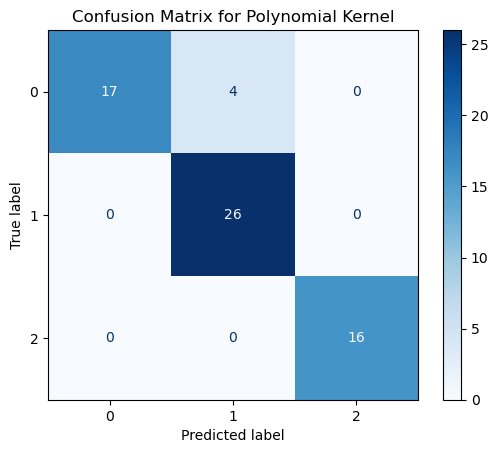

In [75]:
cm_poly = confusion_matrix(y_test, y_pred_poly)
disp_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
disp_poly.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Polynomial Kernel")
plt.show()

### Result

A Support Vector Machine (SVM) classifier was successfully implemented to classify wine quality using linear, rbf, and polynomial kernels.

---